# Machine Learning Lab

This project aims at comparing the efficiency of Convolutional Neural Networks (CNN) with respect to Random Forest (RF) algorithms for the classification of data in the MNIST-fashion dataset.

In [1]:
from classifiers import CNN, RandomForest
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

## Convolutional Network

We shall compare different optimizers in order to improve performance when the neural network is tested against the RF approach. Here follow the candidates.

In [2]:
optimizers = ['SGD']#, 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

The NN is configured as below.

In [3]:
config_dicts = [{
    'epochs': 5,
    'dropout': 0.2,
    'batch_size': 32,
    'optimizer': optimizer,
} for optimizer in optimizers]

neuralnets = [CNN(keras.datasets.fashion_mnist, config_dict) for config_dict in config_dicts]

In [4]:
history = [neuralnet.train() for neuralnet in neuralnets]

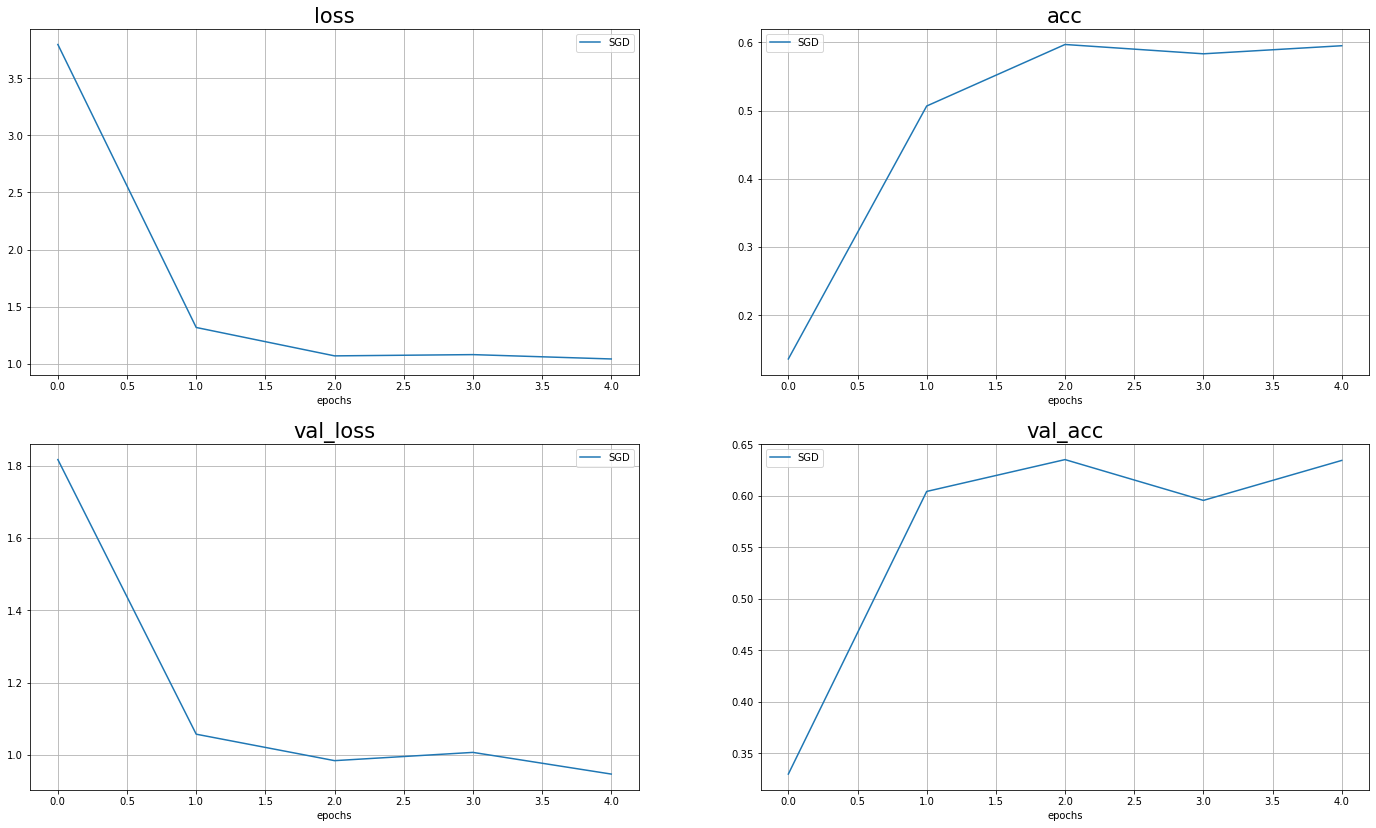

In [5]:
indicators = ['loss', 'acc', 'val_loss', 'val_acc']
fig, axs = plt.subplots(2, 2, figsize=(24,14))
for ax, indicator in zip(axs.flatten(), indicators):
    ax.set_title(indicator, fontsize=21)
    ax.set_xlabel('epochs')
    ax.grid(True)
    for h, nn in zip(history, neuralnets):
        ax.plot(h.history[indicator], label=nn.optimizer)
        ax.legend()

In [6]:
for nn in neuralnets:
    nn.evaluate()

CNN with optimizer: SGD Loss: 0.9473 Accuracy: 0.6342
